# OLS预测加州房价

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import numpy as np

In [2]:
housevalue = fch()
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
X = pd.DataFrame(housevalue.data)
X

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
X.shape

(20640, 8)

In [5]:
y = housevalue.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
y.shape

(20640,)

In [7]:
y.min(), y.max()

(0.14999, 5.00001)

In [8]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
X.columns = housevalue.feature_names
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

In [11]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [12]:
# 恢复索引
Xtrain.index = range(Xtrain.shape[0])
Xtrain

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35
...,...,...,...,...,...,...,...,...
14443,4.7981,16.0,6.408537,1.067073,1003.0,3.057927,33.54,-117.67
14444,2.3816,16.0,6.055954,1.120516,1516.0,2.175036,38.15,-120.46
14445,1.7500,25.0,3.912500,1.029167,1003.0,4.179167,32.71,-117.10
14446,3.5647,33.0,5.423358,1.058394,781.0,2.850365,38.22,-122.49


In [13]:
# 恢复索引
Xtest.index = range(Xtest.shape[0])
Xtest

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09
...,...,...,...,...,...,...,...,...
6187,4.7250,44.0,5.969945,0.975410,943.0,2.576503,37.94,-122.08
6188,2.8500,38.0,5.089347,1.089347,1080.0,3.711340,32.68,-117.06
6189,3.7857,39.0,5.663507,1.052133,1246.0,2.952607,34.06,-118.14
6190,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90


In [14]:
# 建模
reg = LR().fit(Xtrain, Ytrain)

In [15]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [16]:
reg.intercept_

-36.25689322920394

In [17]:
reg.score(Xtest, Ytest)

0.6043668160178817

In [18]:
reg.score(Xtrain, Ytrain)

0.6067440341875014

In [19]:
pd.DataFrame(reg.coef_, index=X.columns)

,0
MedInc,4.373589e-01
HouseAge,1.021127e-02
AveRooms,-1.078072e-01
AveBedrms,6.264338e-01
Population,5.216125e-07
AveOccup,-3.348510e-03
Latitude,-4.130959e-01
Longitude,-4.262110e-01


In [20]:
from sklearn.metrics import mean_squared_error as MSE

Ytest_pred = reg.predict(Xtest)
Ytrain_pred = reg.predict(Xtrain)

MSE(y_true=Ytest, y_pred=Ytest_pred), MSE(y_true=Ytrain, y_pred=Ytrain_pred)

(0.5309012639324571, 0.5218522662533102)

In [21]:
from sklearn.metrics import mean_absolute_error as MAE

MAE(y_true=Ytest, y_pred=Ytest_pred), MAE(y_true=Ytrain, y_pred=Ytrain_pred)

(0.5307069814636167, 0.5309427617356035)

In [22]:
from sklearn.metrics import r2_score

r2_score(y_true=Ytest, y_pred=Ytest_pred), r2_score(y_true=Ytrain, y_pred=Ytrain_pred)

(0.6043668160178817, 0.6067440341875014)

In [23]:
# 交叉验证
cross_val_score(reg, X, y, cv=10, scoring="r2").mean()

0.5110068610524556

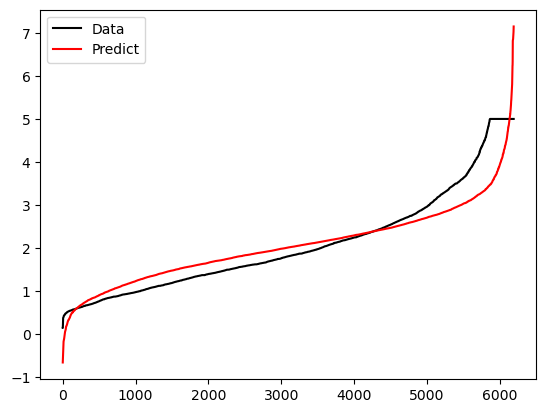

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(len(Ytest)), sorted(Ytest), c="black", label="Data")
plt.plot(range(len(Ytest)), sorted(Ytest_pred), c="red", label="Predict")

plt.legend()

# Ridge预测加州房价

In [25]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import numpy as np

In [26]:
# 导入数据
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [27]:
# 命名特征
feature_name = housevalue.feature_names
X.columns = feature_name

In [28]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

In [30]:
# 恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [31]:
# 岭回归建模
reg = Ridge(alpha=1).fit(Xtrain, Ytrain)
reg.score(Xtest, Ytest)

0.6043610352312279

In [32]:
# 参数选择
from sklearn.model_selection import GridSearchCV

alpharange = np.arange(1, 1001, 100)

GS = GridSearchCV(Ridge(), param_grid={"alpha": alpharange}, cv=5)

GS.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])})

In [33]:
GS.best_params_

{'alpha': 101}

In [34]:
GS.best_score_

0.6048006343679606

In [35]:
LR = LinearRegression().fit(Xtrain, Ytrain)
LR.score(Xtest, Ytest)

0.6043668160178817

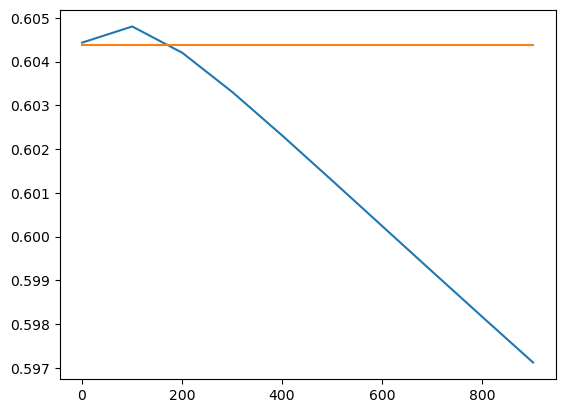

In [36]:
# 绘制得分曲线
result = []
for i in alpharange:
    reg = Ridge(alpha=i)
    score = cross_val_score(reg, Xtrain, Ytrain, cv=5).mean()
    result.append(score)
    
plt.plot(alpharange, result)
plt.plot(alpharange, LR.score(Xtest, Ytest)*np.ones_like(alpharange))

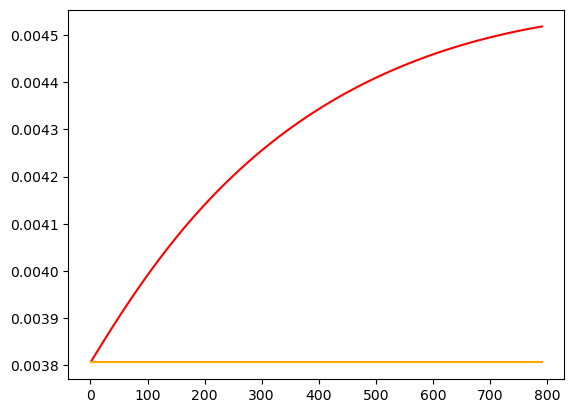

In [37]:
# 模型方差绘图

alpharange = np.arange(1, 800, 10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").var()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").var()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")

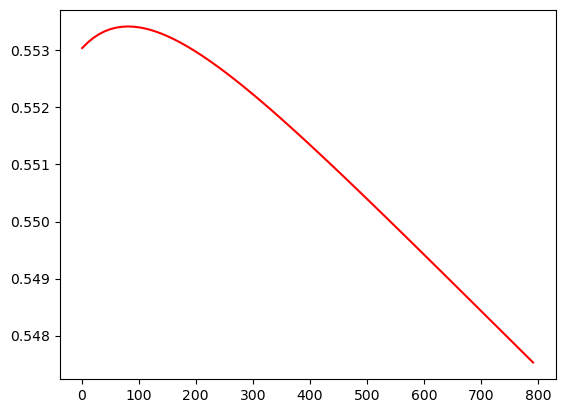

In [38]:
# 模型偏差绘图
ridge, lr = [], []

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
    linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange, ridge, color="red", label="Ridge")

# 绘制岭迹图

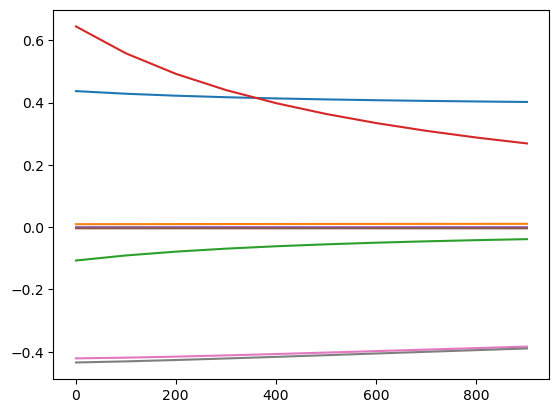

In [39]:
alphas = np.arange(1, 1001, 100)
coefs = []

for a in alphas:
    reg = Ridge(a).fit(X, y)
    coefs.append(reg.coef_)
    
plt.plot(alphas, coefs)

不太好用，为什么交点说明有多重共线性？哪一个喇叭口才是最佳的参数选择？这些问题解决不好，那么就说明这个技术并不可行。

# Lasso回归

In [40]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import numpy as np

In [41]:
# 导入数据
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [42]:
# 命名特征
feature_name = housevalue.feature_names
X.columns = feature_name
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

In [44]:
# 恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [45]:
# 线性回归
reg = LinearRegression().fit(Xtrain, Ytrain)
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [46]:
regRidge = Ridge(alpha=0.1).fit(Xtrain, Ytrain)
regRidge.coef_

array([ 4.37345348e-01,  1.02115085e-02, -1.07781093e-01,  6.26297900e-01,
        5.22555203e-07, -3.34847836e-03, -4.13093701e-01, -4.26206805e-01])

In [47]:
regLasso = Lasso(alpha=0.1).fit(Xtrain, Ytrain)
regLasso.coef_

array([ 3.90885144e-01,  1.60546957e-02, -0.00000000e+00,  0.00000000e+00,
        2.37770148e-05, -3.05018690e-03, -1.07715093e-01, -9.29434448e-02])

In [48]:
#lasso参数选择
from sklearn.linear_model import LassoCV

alpharange = np.logspace(-10, -2, 200, base=10)
alpharange

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [49]:
lasso = LassoCV(alphas=alpharange, cv=5).fit(Xtrain, Ytrain)
lasso.alpha_

0.0020729217795953697

In [50]:
lasso.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [51]:
lasso.mse_path_.shape

(200, 5)

In [52]:
lasso.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [53]:
# 正则化路径
ls = LassoCV(eps=0.00001, n_alphas=300, cv=5).fit(Xtrain, Ytrain)
ls.alpha_

0.0020954551690628535

In [54]:
ls.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

In [55]:
ls.score(Xtest, Ytest)

0.6038915423819202

# 弹性网络

In [56]:
# 弹性网络
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(Xtrain, Ytrain)

elastic.coef_

array([ 3.84380278e-01,  1.38494559e-02,  0.00000000e+00,  0.00000000e+00,
        1.43373197e-05, -3.15901410e-03, -2.34959485e-01, -2.28970177e-01])

# 多项式回归

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [59]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
X

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [60]:
# 生成y
y = np.sin(X) + rnd.normal(size=len(X)) / 3
y

array([-6.54639413e-01,  3.23832143e-01,  1.01463893e+00, -1.04541922e-01,
       -9.54097511e-01, -7.61767511e-01,  2.19222347e-02,  6.37468193e-01,
        3.00653482e-01,  7.81237778e-01,  4.31286305e-02,  4.26174779e-01,
        7.34921650e-01, -8.16896281e-01, -9.10976357e-01, -6.23556402e-01,
       -1.15653261e+00,  3.87722577e-02, -5.27779796e-01, -1.43764744e+00,
        7.20568176e-01, -7.42673638e-01, -9.46371922e-01, -7.96824836e-01,
       -7.32328912e-01,  8.49964652e-01, -1.08763923e+00, -1.82122918e-01,
        4.72745679e-01, -2.73346296e-01,  1.23014210e+00, -8.60492039e-01,
       -4.21323537e-01,  4.08600304e-01, -2.98759618e-01,  9.52331322e-01,
       -9.01575520e-01,  1.55982485e-01,  8.29522626e-01, -2.50901995e-01,
       -7.78358506e-01, -4.18493846e-01,  3.99942125e-02,  8.83836261e-01,
       -7.28709177e-01,  5.24647761e-01, -4.36700367e-01, -3.47166298e-01,
        4.72226156e-01, -2.19059337e-01, -1.17373303e-02,  8.08035747e-01,
        5.16673582e-01,  

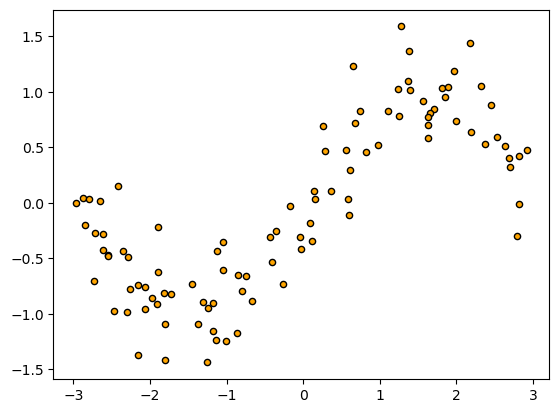

In [61]:
# 生成图
plt.figure()
plt.scatter(X, y, c="orange", edgecolor="k", s=20)
plt.show()

In [62]:
X.shape

(100,)

In [65]:
X = X.reshape(-1, 1)

In [67]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

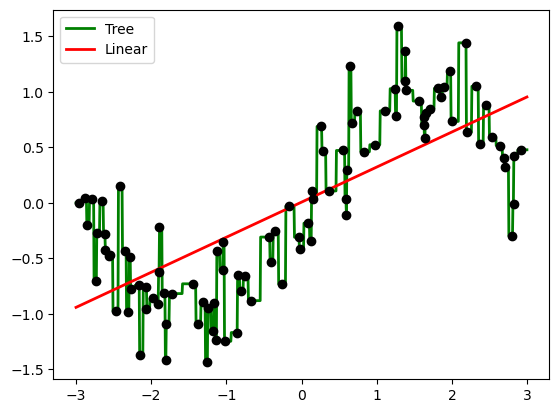

In [68]:
# 放置画布
fig, ax1 = plt.subplots(1)

# 生成测试数据
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# 预测
ax1.plot(line, TreeR.predict(line), linewidth=2, color="green", label="Tree")
ax1.plot(line, LinearR.predict(line), linewidth=2, color="red", label="Linear")

# 绘制原数据
ax1.plot(X[:, 0], y, 'o', c="k")

# 图例
ax1.legend(loc="best")

plt.show()

## 分箱

分成若干个区间，分段拟合

In [69]:
# 适用分箱处理非线性问题
from sklearn.preprocessing import KBinsDiscretizer

# 分箱
enc = KBinsDiscretizer(n_bins=10, encode="onehot")

X_binned = enc.fit_transform(X)

In [70]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [72]:
X[1:10]

array([[ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [71]:
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
LinearR_ = LinearRegression().fit(X_binned, y)

line_binned = enc.transform(line)

LinearR_.predict(line_binned)

array([-0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22

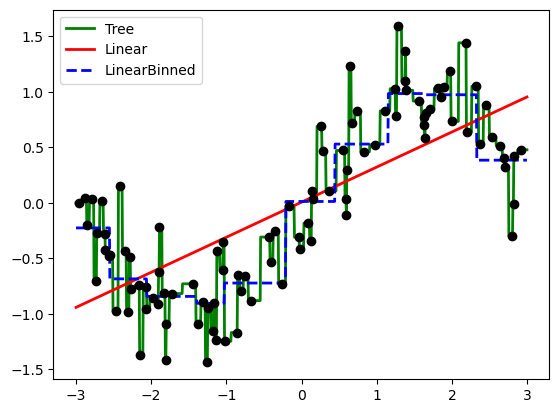

In [77]:
fig, ax2 = plt.subplots(1)

ax2.plot(line, TreeR.predict(line), linewidth=2, color="green", label="Tree")
ax2.plot(line, LinearR.predict(line), linewidth=2, color="red", label="Linear")

ax2.plot(line, LinearR_.predict(line_binned), linewidth=2, color="blue", linestyle="--", label="LinearBinned")

ax2.plot(X[:, 0], y, 'o', c="k")

ax2.legend(loc="best")

plt.show()

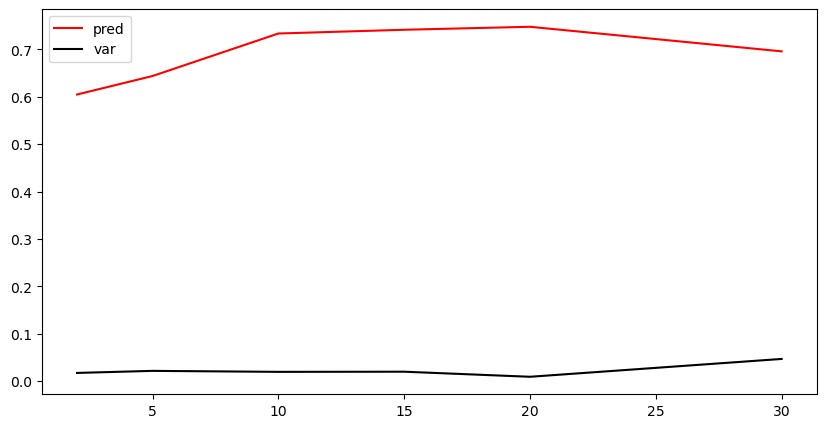

In [83]:
# 选取最优分箱
from sklearn.model_selection import cross_val_score as CVS

# 生成分箱的数量
pred, score, var = [], [], []

binsrange = [2, 5, 10, 15, 20, 30]

for i in binsrange:
    enc = KBinsDiscretizer(n_bins=i, encode="onehot")
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    LinearR_ = LinearRegression()
    cvresult = CVS(LinearR_, X_binned, y, cv=5)
    
    pred.append(cvresult.mean())
    score.append(cvresult)
    var.append(cvresult.var())
    
plt.figure(figsize=[10, 5])
plt.plot(binsrange, pred, c="red", label="pred")
plt.plot(binsrange, var, c="k", label="var")
plt.legend()

## 多项式回归

In [84]:
# 生成数据
X = np.arange(1, 4).reshape(-1, 1)
X

array([[1],
       [2],
       [3]])

In [85]:
X.shape

(3, 1)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

# 生成多项式特征
poly = PolynomialFeatures(degree=2)

In [87]:
# 生成多项式特征
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [89]:
# 三次多项式
poly3 = PolynomialFeatures(degree=3)

X_3 = poly3.fit_transform(X)

X_3

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [90]:
# 三次多项式，不带截距
poly3 = PolynomialFeatures(degree=3, include_bias=False)

X_3 = poly3.fit_transform(X)

X_3

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [91]:
# 生成数据
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

In [92]:
X = X.reshape(-1, 1)

In [94]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [95]:
LinearR = LinearRegression().fit(X, y)
LinearR.score(X, y)

0.5361526059318595

In [96]:
d = 5

poly = PolynomialFeatures(degree=d)

X_ = poly.fit_transform(X)

line_ = poly.transform(line)

LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_, y)

0.8561679370344798

In [100]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5'], dtype=object)

In [98]:
pred_ = np.sin(line)

LinearR_.score(line_, pred_)

0.9868904451787988

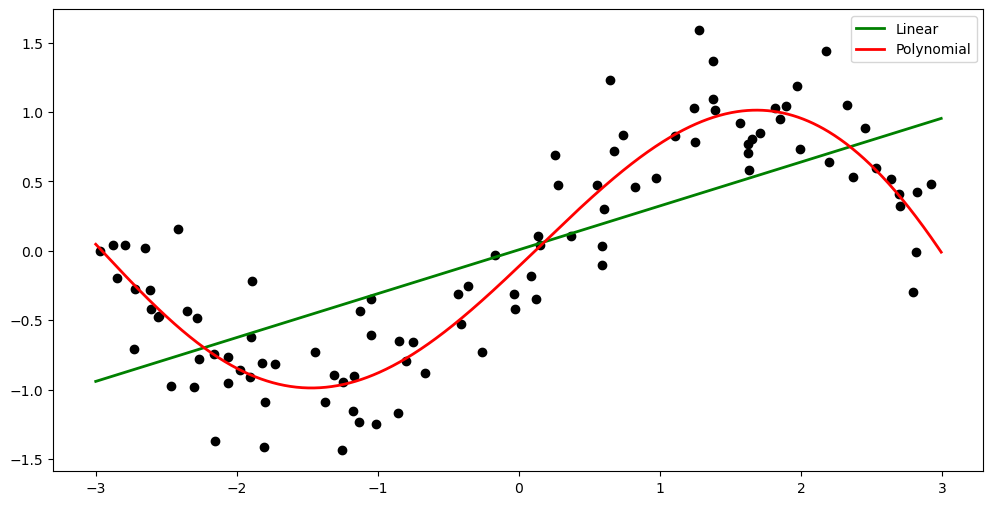

In [97]:
# 测试数据
plt.figure(figsize=[12, 6])
plt.plot(line, LinearR.predict(line), linewidth=2, color="green", label="Linear")
plt.plot(line, LinearR_.predict(line_), linewidth=2, color="red", label="Polynomial")
plt.scatter(X, y, c="k")
plt.legend()
plt.show()

## 预测加州房价

In [101]:
# 导入数据
from sklearn.datasets import fetch_california_housing

housevalue = fetch_california_housing()

housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [107]:
X = pd.DataFrame(housevalue.data)
X.columns = housevalue.feature_names
y = housevalue.target

In [109]:
poly = PolynomialFeatures(degree=4).fit(X, y)

poly.get_feature_names_out(X.columns)

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2', 'MedInc^3', 'MedInc^2 HouseAge',
       'MedInc^2 AveRooms', 'MedInc^2 AveBedrms', 

In [110]:
X_ = poly.transform(X)

In [111]:
reg = LinearRegression().fit(X_, y)

In [112]:
reg.coef_

array([ 3.10384381e-04,  6.40795717e-05, -1.72663387e-06, -5.46074038e-07,
       -7.31947338e-08, -5.22426385e-05, -2.35726315e-07,  1.06093881e-06,
        9.97731149e-08, -9.23917384e-06, -1.24116046e-05, -1.95256686e-05,
       -2.52989912e-06, -4.55111851e-05,  2.40720924e-06, -1.12057845e-06,
        1.15004531e-05, -2.26524475e-05,  8.42548915e-06, -7.79671632e-06,
       -7.46330684e-04,  3.51619271e-05,  4.86375433e-06,  5.49018833e-05,
       -1.20493979e-05,  3.18477708e-06, -1.21333041e-04, -5.17269498e-06,
        2.23420861e-07, -4.50240698e-07,  1.71777309e-06, -4.36051078e-05,
       -9.66562472e-07, -1.90936666e-06,  1.24593428e-05,  2.42224471e-05,
       -3.97004731e-05, -6.91843843e-04,  2.09415714e-03, -7.49695698e-06,
       -5.40831736e-07, -6.48829125e-06, -3.96609214e-06, -2.50128414e-05,
       -8.07225480e-06, -9.18560891e-05, -1.36899539e-04, -9.12752325e-05,
       -1.22205429e-05,  6.28218569e-04,  3.48055590e-05, -1.72064539e-04,
        5.42747340e-04, -

In [113]:
coeff = pd.DataFrame(reg.coef_, index=poly.get_feature_names_out(X.columns))
coeff

,0
1,3.103844e-04
MedInc,6.407957e-05
HouseAge,-1.726634e-06
AveRooms,-5.460740e-07
AveBedrms,-7.319473e-08
...,...
Latitude^4,-8.710268e-03
Latitude^3 Longitude,-1.076631e-02
Latitude^2 Longitude^2,-4.985159e-03
Latitude Longitude^3,-1.017568e-03


In [114]:
reg_origin = LinearRegression().fit(X, y)

reg_origin.score(X, y)

0.606232685199805

In [115]:
reg.score(X_, y)

0.7453000992087552

In [117]:
# 导入随机森林
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=420)
RFR = RFR.fit(X, y)
RFR.score(X, y)

0.974088613941268